In [1]:
import os
from google.colab import drive


print("Mounting Google Drive...")
drive.mount('/content/drive')
print("Google Drive mounted successfully!")


print("\nContents of your Google Drive (My Drive):")
!ls "/content/drive/My Drive"




target_folder_path = '/content/drive/My Drive/cat dataset'

print(f"\nAttempting to change directory to: {target_folder_path}")


if os.path.isdir(target_folder_path):
    os.chdir(target_folder_path)
    print(f"Successfully changed current working directory to: {os.getcwd()}")


    print("\nContents of 'cat dataset' folder:")
    !ls
else:
    print(f"ERROR: The folder '{target_folder_path}' was not found.")
    print("Please double-check the folder name (case, spaces) in your Google Drive.")

Mounting Google Drive...
Mounted at /content/drive
Google Drive mounted successfully!

Contents of your Google Drive (My Drive):
'11. BAB 10-GLOBALISASI.gslides'
'3.5 ELC151 & ELC 231 TOPIC SENTENCE AND MAIN IDEA.ppt'
'3. TOPIC SENTENCE AND SUPPORTING DETAILS.docx'
'3. TOPIC SENTENCE & SUPPORTING DETAILS.pptx'
 5_6057587716403495369.doc
'7. BAB 6- penghayatan al-saadah_2.gslides'
'8. BAB 7- PENGHAYATAN BUDAYA ILMU DAN PENDIDIKAN.gslides'
'9. BAB 8- INSAN BERADAB SEBAGAI MATLAMAT PENDIDIKAN [Autosaved].gslides'
'AKTIVITI 10 (2).gdoc'
'AKTIVITI 10.gdoc'
'AKTIVITI 3.gdoc'
'AKTIVITI 4.gdoc'
'AKTIVITI 5.gdoc'
'AKTIVITI 6.gdoc'
'AKTIVITI 8.gdoc'
'AKTIVITI 9.gdoc'
'ANSWER EXERCISE STUDENT FOR LOOP.gdoc'
'Answer for listening unit 1.pdf'
'Answer Test 1_Question.gdoc'
'Aqua Marketing Plan _ by Slidesgo.gslides'
'borang mrsm pdf.pdf'
 BORANG_TAMAT_LATIHAN_INDUSTRI_NUR_FARZANAH_BINTI_ASMADI_2020627144.pdf
'CAMPUS RESOURCES.gdoc'
'CamScanner 12-10-2020 16.58 (1).pdf'
'CamScanner 12-10-2020 16.58.p

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense,Flatten,BatchNormalization,Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
!ls /content/drive/My\ Drive/cat\ dataset

ResNet50.h5  test  train  train_new  val  valid


In [4]:
import os
import shutil
import random

random.seed(42)

src_dir = '/content/drive/My Drive/cat dataset/train'
dst_dir = '/content/drive/My Drive/cat dataset'


cat_breeds = ['siamese', 'persian', 'mainecoon']


for split in ['train_new', 'valid', 'test']:
    for breed in cat_breeds:
        os.makedirs(os.path.join(dst_dir, split, breed), exist_ok=True)


train_split = 0.7
valid_split = 0.15
test_split = 0.15


for breed in cat_breeds:
    full_dir = os.path.join(src_dir, breed)
    images = os.listdir(full_dir)
    random.shuffle(images)

    total = len(images)
    n_train = int(total * train_split)
    n_valid = int(total * valid_split)

    train_files = images[:n_train]
    valid_files = images[n_train:n_train + n_valid]
    test_files  = images[n_train + n_valid:]

    def copy_files(file_list, split_name):
        for file_name in file_list:
            src = os.path.join(full_dir, file_name)
            dst = os.path.join(dst_dir, split_name, breed, file_name)
            shutil.copy2(src, dst)

    copy_files(train_files, 'train_new')
    copy_files(valid_files, 'valid')
    copy_files(test_files, 'test')

print("Dataset split complete for: siamese, persian, mainecoon")

Dataset split complete for: siamese, persian, mainecoon


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense,Flatten,BatchNormalization,Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [6]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, DenseNet121, MobileNetV3Small
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import time

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


img_size = (224, 224)
batch_size = 32


train_path = '/content/drive/My Drive/cat dataset/train_new'
val_path = '/content/drive/My Drive/cat dataset/valid'
test_path = '/content/drive/My Drive/cat dataset/test'


datagen = ImageDataGenerator(rescale=1./255)


train_data = datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_data = datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


class_names = list(train_data.class_indices.keys())
num_classes = len(class_names)


Found 5288 images belonging to 3 classes.
Found 1132 images belonging to 3 classes.
Found 2758 images belonging to 3 classes.


In [8]:
def build_model(base_model):
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [9]:
pretrained_models = {
    'ResNet50': ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3)),
    'DenseNet121': DenseNet121(weights='imagenet', include_top=False, input_shape=(224,224,3)),
    'MobileNetV3': MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224,224,3))
}

histories = {}
models_dict = {}

for name, base in pretrained_models.items():
    print(f"\n🔁 Training {name} for 50 epochs")
    model = build_model(base)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    start = time.time()
    history = model.fit(train_data, validation_data=val_data, epochs=50)
    end = time.time()

    model.save(f'{name}.h5')
    print(f"✅ {name} saved — Training Time: {end - start:.2f}s")

    histories[name] = history
    models_dict[name] = model

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

🔁 Training ResNet50 for 50 epochs


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 113s 317ms/step - accuracy: 0.7130 - loss: 0.8371 - val_accuracy: 0.3419 - val_loss: 1.2454
Epoch 2/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - accuracy: 0.8765 - loss: 0.3301 - val_accuracy: 0.3419 - val_loss: 1.2238
Epoch 3/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 18s 109ms/step - accuracy: 0.9066 - loss: 0.2595 - val_accuracy: 0.3269 - val_loss: 3.7317
Epoch 4/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 18s 106ms/step - accuracy: 0.8877 - loss: 0.2987 - val_accuracy: 0.3454 - val_loss: 1.3643
Epoch 5/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 18s 109ms/step - accuracy: 0.9370 - loss: 0.1830 - val_accuracy: 0.5733 - val_loss: 0.9663
Epoch 6/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - accuracy: 0.9380 - loss: 0.1712 - val_accuracy: 0.7898 - val_loss: 0.8167
Epoch 7/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.9567 - loss: 0.1315 - val_accuracy: 0.6802 - val_loss: 1.2179
Epoch 8/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.9604 - loss: 

✅ ResNet50 saved — Training Time: 992.06s

🔁 Training DenseNet121 for 50 epochs
Epoch 1/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 299s 859ms/step - accuracy: 0.7642 - loss: 0.6431 - val_accuracy: 0.7261 - val_loss: 2.2715
Epoch 2/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 18s 108ms/step - accuracy: 0.8936 - loss: 0.3118 - val_accuracy: 0.8931 - val_loss: 0.3097
Epoch 3/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 18s 108ms/step - accuracy: 0.9164 - loss: 0.2252 - val_accuracy: 0.8613 - val_loss: 0.3736
Epoch 4/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 18s 109ms/step - accuracy: 0.9293 - loss: 0.2018 - val_accuracy: 0.7588 - val_loss: 0.7945
Epoch 5/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 19s 114ms/step - accuracy: 0.9330 - loss: 0.2019 - val_accuracy: 0.7668 - val_loss: 1.1213
Epoch 6/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 19s 116ms/step - accuracy: 0.9509 - loss: 0.1522 - val_accuracy: 0.9046 - val_loss: 0.2705
Epoch 7/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 19s 113ms/step - accuracy: 0.9527 - loss: 0.1295 - val_accuracy: 0.5892 - val_loss: 3.1435
Ep

✅ DenseNet121 saved — Training Time: 1202.30s

🔁 Training MobileNetV3 for 50 epochs
Epoch 1/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 107s 336ms/step - accuracy: 0.7426 - loss: 0.6237 - val_accuracy: 0.3419 - val_loss: 1.1011
Epoch 2/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - accuracy: 0.9163 - loss: 0.2218 - val_accuracy: 0.3269 - val_loss: 1.1398
Epoch 3/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 18s 107ms/step - accuracy: 0.9499 - loss: 0.1364 - val_accuracy: 0.3269 - val_loss: 1.1415
Epoch 4/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 18s 107ms/step - accuracy: 0.9689 - loss: 0.0979 - val_accuracy: 0.3269 - val_loss: 1.2751
Epoch 5/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 18s 109ms/step - accuracy: 0.9726 - loss: 0.0837 - val_accuracy: 0.3269 - val_loss: 2.7890
Epoch 6/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 18s 108ms/step - accuracy: 0.9718 - loss: 0.0881 - val_accuracy: 0.3269 - val_loss: 1.5252
Epoch 7/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 18s 108ms/step - accuracy: 0.9756 - loss: 0.0812 - val_accuracy: 0.3269 - val_loss: 2.416

✅ MobileNetV3 saved — Training Time: 969.58s


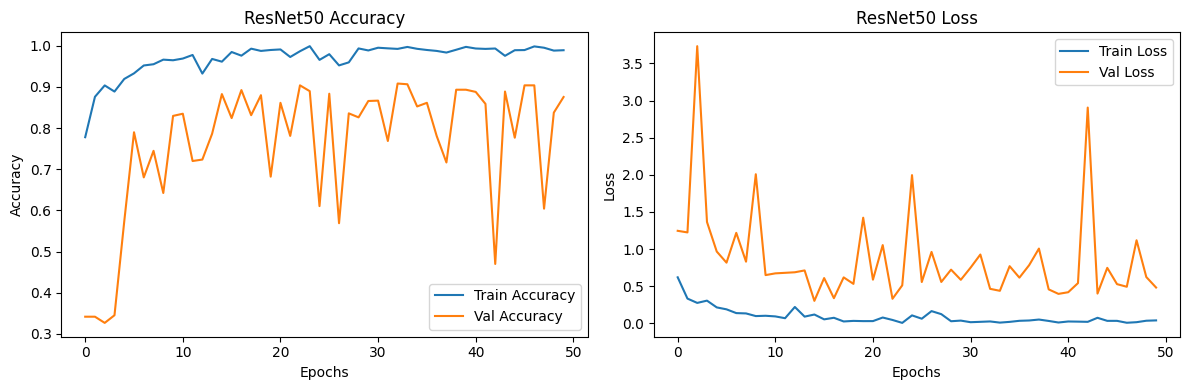

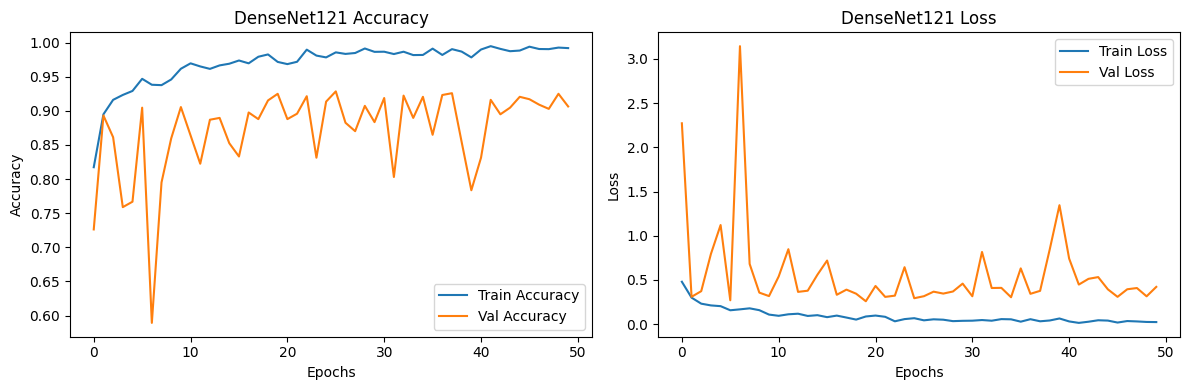

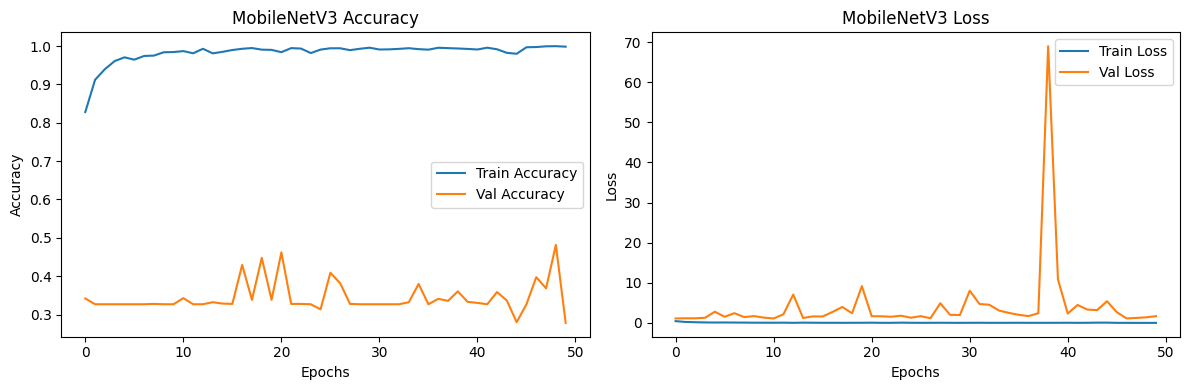

In [10]:
def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))


    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


for name, history in histories.items():
    plot_history(history, name)

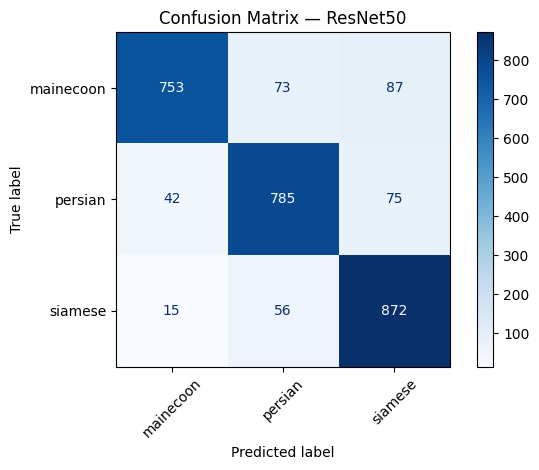

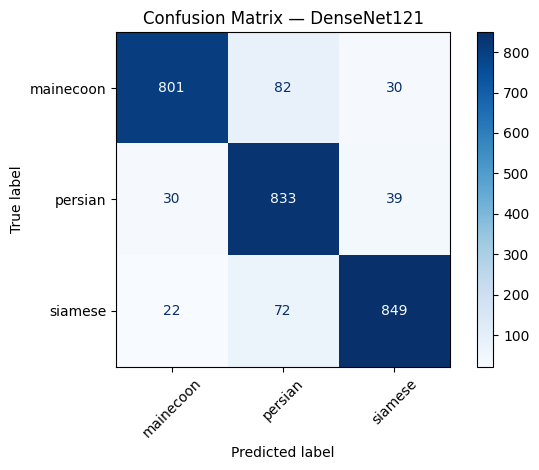

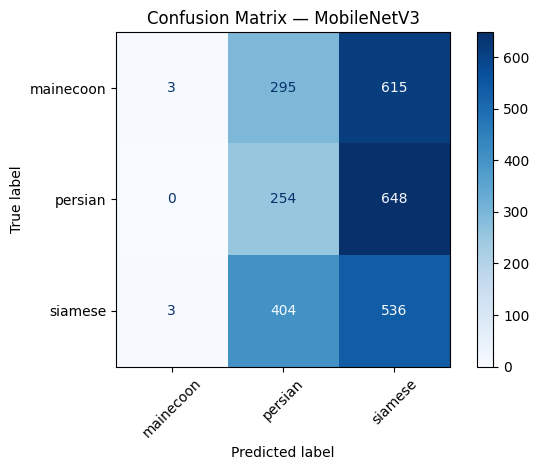

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def show_confusion_matrix(model, test_data, model_name):
    test_data.reset()
    y_true = test_data.classes
    y_pred = np.argmax(model.predict(test_data, verbose=0), axis=1)

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title(f'Confusion Matrix — {model_name}')
    plt.tight_layout()
    plt.show()


for name, model in models_dict.items():
    show_confusion_matrix(model, test_data, name)

In [12]:
from sklearn.metrics import precision_recall_fscore_support
import time

evaluation_results = []

for name, model in models_dict.items():
    print(f"⏱ Evaluating {name}")
    test_data.reset()

    start = time.time()
    loss, acc = model.evaluate(test_data, verbose=0)
    end = time.time()

    y_true = test_data.classes
    y_pred = np.argmax(model.predict(test_data, verbose=0), axis=1)
    precision, _, _, _ = precision_recall_fscore_support(y_true, y_pred, average=None)
    mAP = np.mean(precision)

    evaluation_results.append({
        'Model': name,
        'Test Accuracy (%)': round(acc * 100, 2),
        'mAP': round(mAP, 4),
        'Parameters': model.count_params(),
        'Eval Time (s)': round(end - start, 2)
    })

# Show as DataFrame
import pandas as pd
df_summary = pd.DataFrame(evaluation_results).sort_values(by='Test Accuracy (%)', ascending=False)
print(df_summary)

⏱ Evaluating ResNet50
⏱ Evaluating DenseNet121
⏱ Evaluating MobileNetV3
         Model  Test Accuracy (%)     mAP  Parameters  Eval Time (s)
1  DenseNet121              90.03  0.9026     7300675          14.31
0     ResNet50              87.38  0.8773    24113027           9.26
2  MobileNetV3              28.75  0.3548     1087603          10.11
